In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
csv_file_path = 'best_models_WB_val.csv'
df = pd.read_csv(csv_file_path, sep=';')
print(df.shape)
df.head()

(45, 9)


,ROI,stage,num_hidden_layers,learning_rate,dropout,12_reg,correlation_score,best,Unnamed: 8
0,EBA,stage_4,1,0.0001,0.4,0.010,"0,27",not max,NaN
1,FFA,stage_4,1,0.0001,0.4,0.010,"0,25",not max,NaN
2,LOC,stage_4,1,0.0001,0.4,0.001,"0,23",not max,NaN
3,PPA,stage_4,1,0.0010,0.4,0.010,"0,16",not max,NaN
4,STS,stage_4,1,0.0001,0.4,0.010,"0,18",not max,NaN


In [6]:
# Replace commas with dots in the 'correlation_score' column
df['correlation_score'] = df['correlation_score'].str.replace(',', '.')
# Delete the 'Unnamed: 8' column
df = df.drop(columns=['Unnamed: 8'])
df.head()

,ROI,stage,num_hidden_layers,learning_rate,dropout,12_reg,correlation_score,best
0,EBA,stage_4,1,0.0001,0.4,0.010,0.27,not max
1,FFA,stage_4,1,0.0001,0.4,0.010,0.25,not max
2,LOC,stage_4,1,0.0001,0.4,0.001,0.23,not max
3,PPA,stage_4,1,0.0010,0.4,0.010,0.16,not max
4,STS,stage_4,1,0.0001,0.4,0.010,0.18,not max


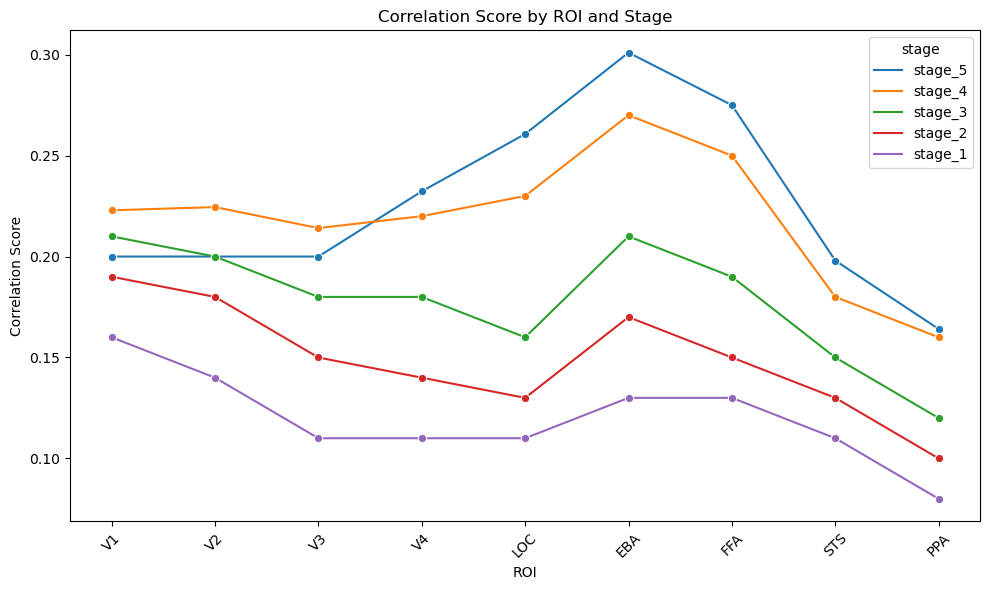

In [11]:
# Convert 'correlation_score' to numeric, errors='coerce' will set invalid parsing as NaN
df['correlation_score'] = pd.to_numeric(df['correlation_score'], errors='coerce')

# Convert 'ROI' to a categorical type with a specific order
roi_order = ["V1", "V2", "V3", "V4", "LOC", "EBA", "FFA", "STS", "PPA"]
df['ROI'] = pd.Categorical(df['ROI'], categories=roi_order, ordered=True)

# Adjust the stage_order to match the required naming convention
stage_order = ['stage_5', 'stage_4', 'stage_3', 'stage_2', 'stage_1']
df['stage'] = pd.Categorical(df['stage'], categories=stage_order, ordered=True)

# Create the line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(data=df, x='ROI', y='correlation_score', hue='stage', marker='o')

plt.title('Correlation Score by ROI and Stage')  # Add a title
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.ylabel('Correlation Score')  # Y-axis label
plt.xlabel('ROI')  # X-axis label
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()

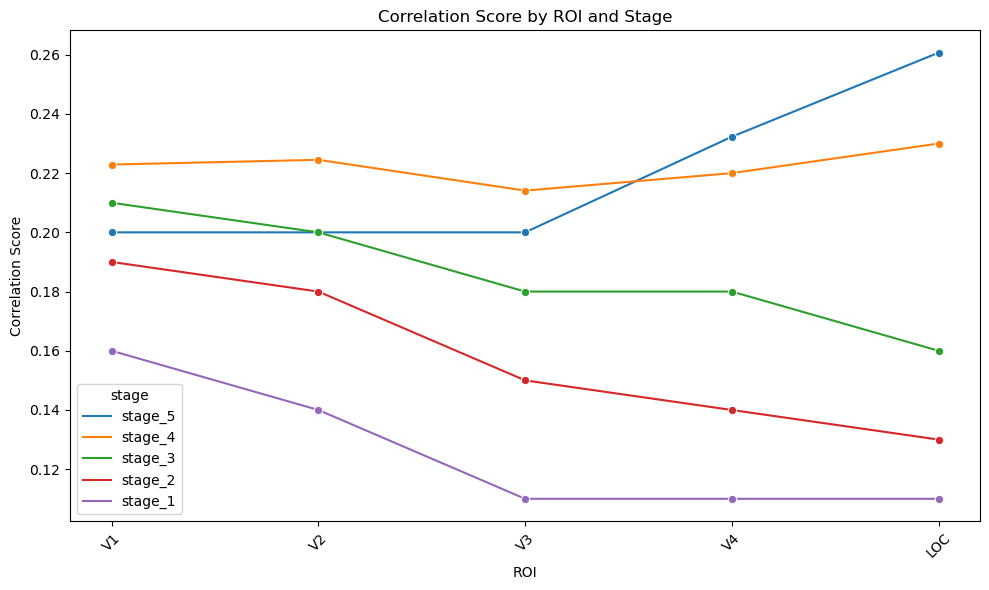

In [15]:
# Filter the DataFrame to include only the ROIs up to "LOC"
filtered_df = df[df['ROI'].isin(["V1", "V2", "V3", "V4", "LOC"])]

# Create the line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(data=filtered_df, x='ROI', y='correlation_score', hue='stage', marker='o')

plt.title('Correlation Score by ROI and Stage')  # Add a title
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.ylabel('Correlation Score')  # Y-axis label
plt.xlabel('ROI')  # X-axis label
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()